In [1]:
import gensim
from gensim.models.callbacks import LossLogger, LossSetter
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from numpy import dot
import os

ROOT = "/Users/alext/Documents/Master/Thesis/"

# Unbiased dot product model

In [2]:
model_fn = os.path.join(ROOT, "models/word2vec_baseline/w2v_levy_sg_10_600_A025_a0001_n5_w5_c100_cosine")
model = gensim.models.Word2Vec.load(model_fn)
wv = model.wv

1 the 100593018 2.3221614360809326
2 of 48027448 2.5992302894592285
3 and 41577282 2.086838483810425
4 in 39072481 2.7335572242736816
5 to 32483218 2.41928768157959
6 a 32167974 2.8655757904052734
7 is 18052868 3.2843451499938965
8 was 15830440 3.009490966796875
9 for 12598803 2.570866346359253
10 as 11954333 2.485748052597046
10231
27662


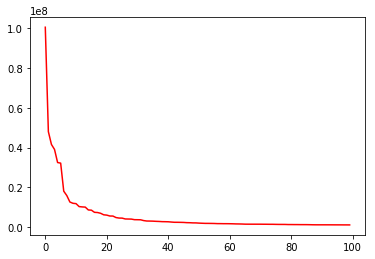

In [8]:
for i, w in enumerate(wv.index2entity[:10]):
    print("{} {} {} {}".format(i+1, w, wv.vocab[w].count, norm(wv[w])))
    
x = range(len(wv.index2entity))
freq = [wv.vocab[w].count for w in wv.index2entity]

restrict_vocab = 100
fig = plt.figure(1)
plt.plot(x[:restrict_vocab], freq[:restrict_vocab], color="red")

top_words = list(filter(lambda x: x > 10000, freq))
print(len(top_words))
print(freq[5000])

Max norm is [8.683641, 8.700732, 8.701561, 8.730704, 8.743272, 8.747967, 8.752114, 8.776081, 8.779242, 8.780389, 8.784313, 8.790354, 8.800285, 8.811593, 8.815075, 8.822819, 8.8298645, 8.832542, 8.854437, 8.8576765, 8.868744, 8.875029, 8.8912945, 8.926995, 8.93286, 8.940613, 8.946748, 8.95164, 8.95451, 9.000033, 9.003764, 9.006345, 9.018928, 9.019307, 9.032842, 9.059155, 9.072513, 9.113461, 9.116866, 9.140043, 9.140099, 9.161382, 9.167497, 9.182873, 9.197537, 9.207826, 9.216354, 9.22309, 9.22668, 9.243213, 9.255152, 9.28314, 9.291429, 9.291578, 9.309892, 9.31062, 9.314605, 9.329025, 9.3382435, 9.353029, 9.3572645, 9.359647, 9.37915, 9.382126, 9.388818, 9.39432, 9.410406, 9.462758, 9.463034, 9.473383, 9.508466, 9.540137, 9.552559, 9.582028, 9.596305, 9.627454, 9.629884, 9.71086, 9.7769, 9.944922, 9.995444, 10.062646, 10.131445, 10.258827, 10.261267, 10.289562, 10.319579, 10.385138, 10.387717, 10.396989, 10.426204, 10.43171, 10.514096, 10.540896, 10.55751, 10.585625, 10.603075, 10.823979,

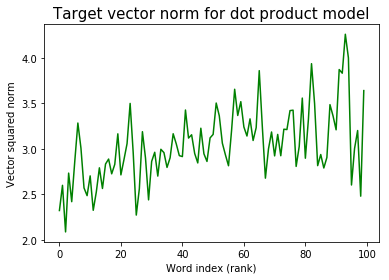

In [9]:
x = range(len(wv.index2entity))
norms = [norm(wv.word_vec(w)) for w in wv.index2entity]

sorted_norms = sorted(norms)
print("Max norm is", sorted_norms[-100:])

# plt.ylim([0, 30])
plt.plot(x[:restrict_vocab], norms[:restrict_vocab], color="green")
plt.ylabel("Vector squared norm")
plt.xlabel("Word index (rank)")
_ = plt.title("Target vector norm for dot product model", fontsize=15)

# Euclidean distance model with bias

In [6]:
bias_model_fn = os.path.join(ROOT, "models/geometric_emb/w2v_levy_sg_5_600_A025_a0001_n5_w5_c100_euclid_bias")
bias_model = gensim.models.Word2Vec.load(bias_model_fn)

In [8]:
wv_bias = bias_model.wv
b0 = bias_model.trainables.b0
b1 = bias_model.trainables.b1

#### Vector norms (dot product model vs Euclidean model w/ biases)

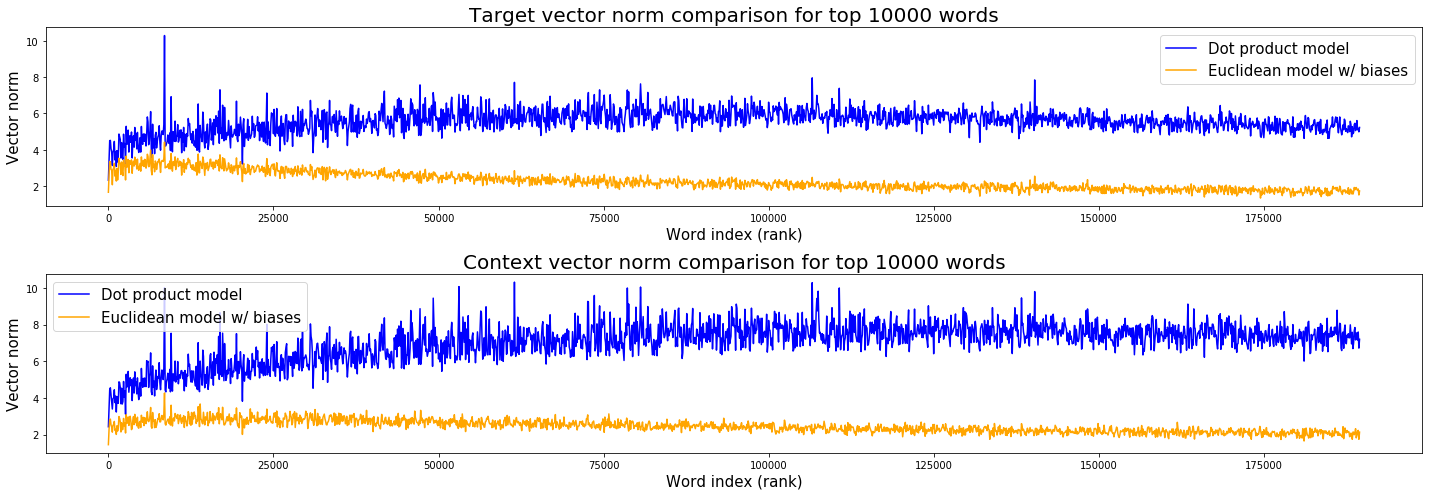

In [13]:
restrict_vocab = 10000

# Plot target vector norms.
fig = plt.figure(figsize=(20, 7))
x = range(len(wv.index2entity))
dotprod_norms = [norm(wv.word_vec(w)) for w in wv.index2entity]
euclid_norms = [norm(wv_bias.word_vec(w)) for w in wv.index2entity]

plt.subplot(211)
l1, = plt.plot(x[::100], dotprod_norms[::100], color="blue")
l2, = plt.plot(x[::100], euclid_norms[::100], color="orange")
plt.legend([l1, l2], ["Dot product model", "Euclidean model w/ biases"], fontsize=15)
plt.ylabel("Vector norm", fontsize=15)
plt.xlabel("Word index (rank)", fontsize=15)
_ = plt.title("Target vector norm comparison for top {} words".format(restrict_vocab), fontsize=20)


# Plot target vector norms.
dotprod_norms = [norm(model.trainables.syn1neg[idx]) for idx in x]
euclid_norms = [norm(bias_model.trainables.syn1neg[idx]) for idx in x]

plt.subplot(212)
l1, = plt.plot(x[::100], dotprod_norms[::100], color="blue")
l2, = plt.plot(x[::100], euclid_norms[::100], color="orange")
plt.legend([l1, l2], ["Dot product model", "Euclidean model w/ biases"], fontsize=15)
plt.ylabel("Vector norm", fontsize=15)
plt.xlabel("Word index (rank)", fontsize=15)
_ = plt.title("Context vector norm comparison for top {} words".format(restrict_vocab), fontsize=20)

fig.tight_layout()

#### Input (word) embeddings


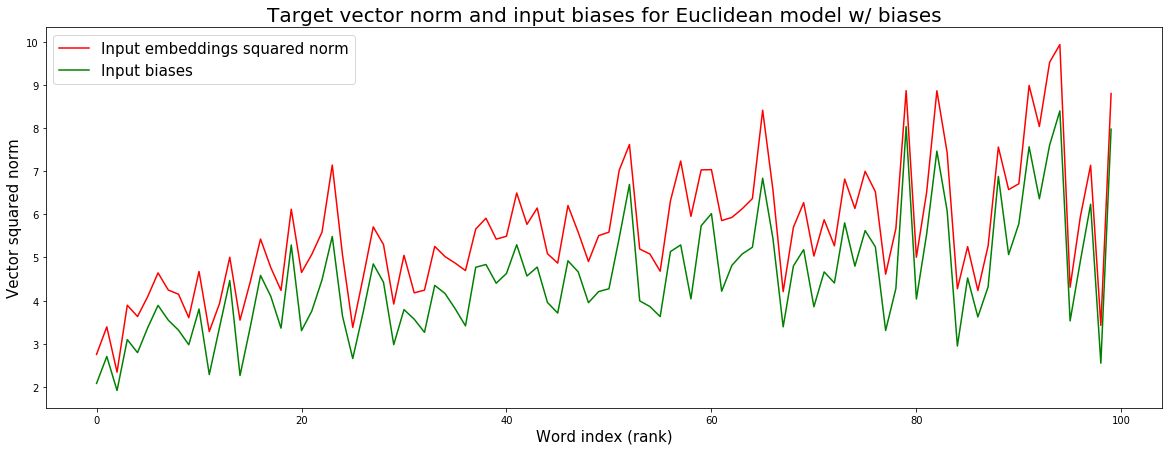

In [99]:
restrict_vocab = 100

x = range(restrict_vocab)
norm_sq = [dot(wv_bias.word_vec(w), wv_bias.word_vec(w)) for w in wv_bias.index2entity[:restrict_vocab]]
biases = b0.reshape([-1])[:restrict_vocab]

fig = plt.figure(figsize=(20, 7))
l1, = plt.plot(x, norm_sq, color="red")
l2, = plt.plot(x, biases, color="green")
plt.legend([l1, l2], ['Input embeddings squared norm', 'Input biases'], fontsize=15)
plt.ylabel("Vector squared norm", fontsize=15)
plt.xlabel('Word index (rank)', fontsize=15)
_ = plt.title("Target vector norm and input biases for Euclidean model w/ biases", fontsize=20)

#### Output (context) embeddings

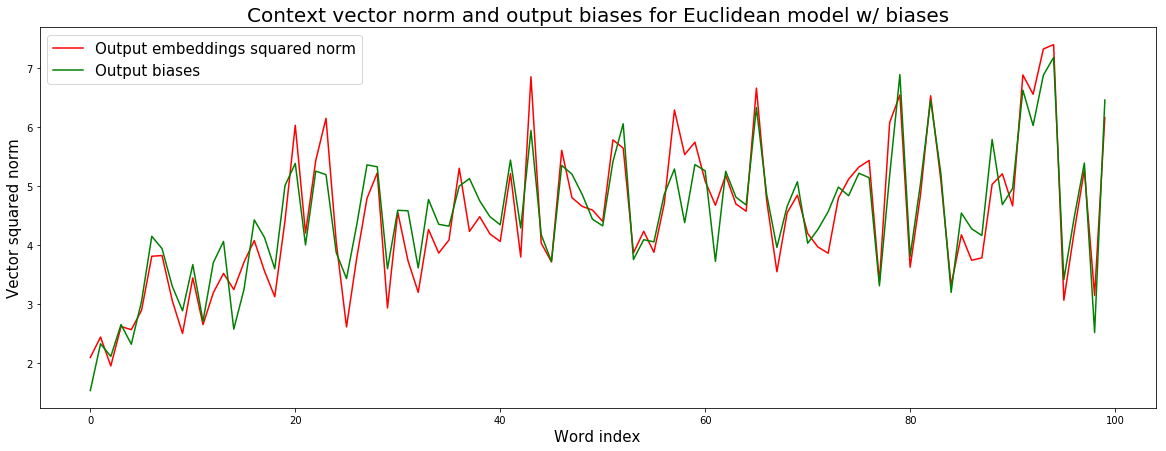

In [98]:
restrict_vocab = 100

x = range(restrict_vocab)
norm_sq = [dot(bias_model.trainables.syn1neg[idx], bias_model.trainables.syn1neg[idx]) for idx in x]
biases = b1.reshape([-1])[:restrict_vocab]

fig = plt.figure(figsize=(20, 7))
l1, = plt.plot(x, norm_sq, color="red")
l2, = plt.plot(x, biases, color="green")
plt.legend([l1, l2], ['Output embeddings squared norm', 'Output biases'], fontsize=15)
plt.ylabel("Vector squared norm", fontsize=15)
plt.xlabel('Word index', fontsize=15)
_ = plt.title("Context vector norm and output biases for Euclidean model w/ biases", fontsize=20)

# Evolution of vector norms during training for dot product embeddings

Buckets:
[10, 100, 500, 1000, 5000, 10000, 50000, 100000]


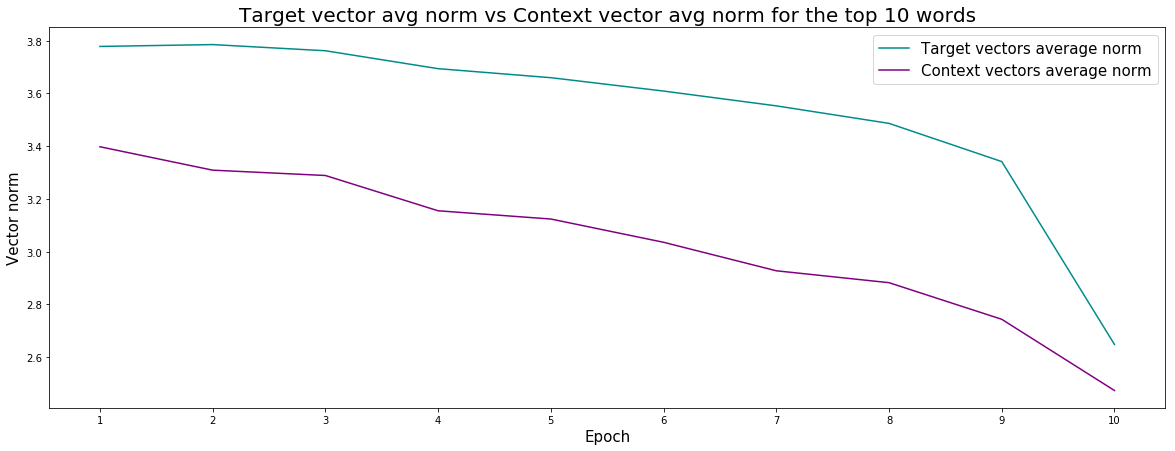

In [4]:
train_log = os.path.join(ROOT, "train_logs/train_levy_sg_10_600_A025_a0001_n5_w5_c100_cosine")
buckets = []

def get_data_from_line(line):
    line = line.split(":")
    epoch = int(line[0].split(" ")[2])
    target_emb_norm = float(line[2].split(" ")[1])
    context_emb_norm = float(line[2].split(" ")[2])
    return [epoch, target_emb_norm, context_emb_norm]

with open(train_log, "r") as f:
    content = [line.strip() for line in f.readlines()]
    
    # Get buckets.
    initial_data = list(filter(lambda l: "EPOCH - 0 : Average target and context vector norm" in l, content))
    buckets = [int(l.split(" ")[13]) for l in initial_data]
    print("Buckets:")
    print(buckets)
    
    bucket_data = []
    for thresh in buckets:
        data = list(filter(lambda l: "{} words".format(thresh) in l, content))
        bucket_data += [np.array([get_data_from_line(l) for i, l in enumerate(data)])]
    
fig = plt.figure(figsize=(20, 7))
# Plot target vector avg norm VS context vector avg norm for top 10 words
w10 = bucket_data[0]
l1, = plt.plot(w10[1:, 0], w10[1:, 1], color="darkcyan")
l2, = plt.plot(w10[1:, 0], w10[1:, 2], color="purple")
plt.legend([l1, l2], ['Target vectors average norm', 'Context vectors average norm'], fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Vector norm', fontsize=15)
plt.xticks(range(len(bucket_data[0]))[1:])
_ = plt.title("Target vector avg norm vs Context vector avg norm for the top 10 words", fontsize=20)    

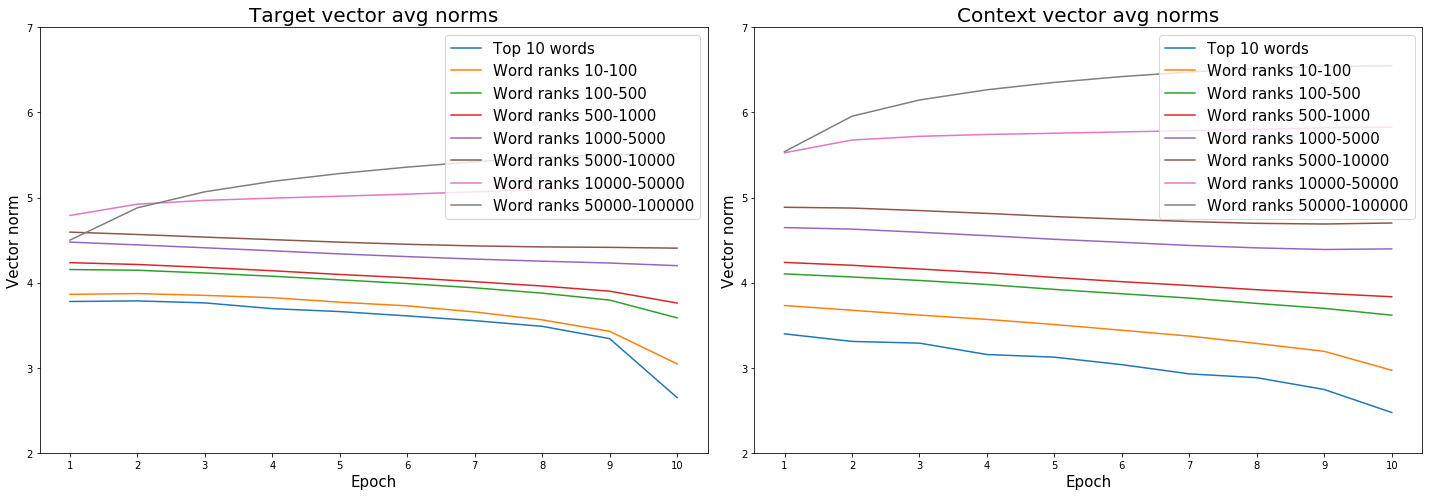

In [5]:
fig = plt.figure(figsize=(20, 7))

labels = []
label_names = []

# Plot target vector avg norm for all buckets
plt.subplot(121)
for i, b in enumerate(buckets):
    norms = bucket_data[i]
    label, = plt.plot(norms[1:, 0], norms[1:, 1])
    labels.append(label)
    if i == 0:
        label_names.append("Top {} words".format(b))
    else:
        label_names.append("Word ranks {}-{}".format(buckets[i-1], b))
plt.legend(labels, label_names, fontsize=15, loc='upper right')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Vector norm', fontsize=15)
plt.xticks(range(len(bucket_data[0]))[1:])
plt.ylim([2, 7])
_ = plt.title("Target vector avg norms", fontsize=20) 

# Plot context vector avg norm for all buckets
plt.subplot(122)
labels = []
label_names = []
for i, b in enumerate(buckets):
    norms = bucket_data[i]
    label, = plt.plot(norms[1:, 0], norms[1:, 2])
    labels.append(label)
    if i == 0:
        label_names.append("Top {} words".format(b))
    else:
        label_names.append("Word ranks {}-{}".format(buckets[i-1], b))
plt.legend(labels, label_names, fontsize=15, loc='upper right')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Vector norm', fontsize=15)
plt.xticks(range(len(bucket_data[0]))[1:])
plt.ylim([2, 7])
_ = plt.title("Context vector avg norms", fontsize=20) 

fig.tight_layout()